# Telco Customer Churn Analysis

## Dataset: Telco Customer Churn

**Deskripsi:**
Dataset ini menggambarkan perilaku dan profil pelanggan di perusahaan Telco yang digunakan guna menganalisis dan memprediksi retensi pelanggan.

**Data:**
Setiap baris mewakili pelanggan, setiap kolom berisi atribut pelanggan.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Telco_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Payment method dengan monthly charge terbesar rata-rata per pelanggan adalah 'Electronic check' dengan rata-rata monthly charge sebesar 76.26


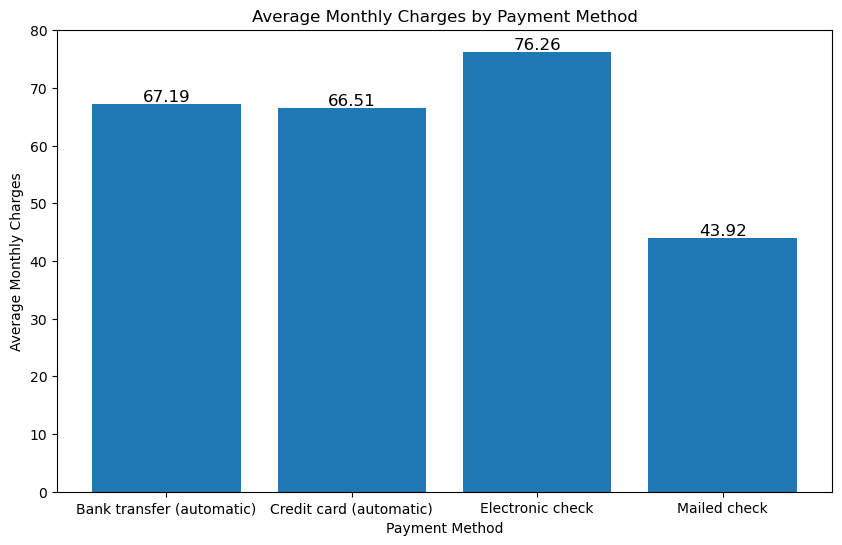

In [3]:
# Mengelompokkan berdasarkan PaymentMethod dan menghitung rata-rata MonthlyCharges
average_monthly_charge = df.groupby('PaymentMethod')['MonthlyCharges'].mean()

# Mencari payment method dengan rata-rata monthly charge terbesar
max_payment_method = average_monthly_charge.idxmax()
max_monthly_charge = average_monthly_charge.max()

print(f"Payment method dengan monthly charge terbesar rata-rata per pelanggan adalah '{max_payment_method}' dengan rata-rata monthly charge sebesar {max_monthly_charge:.2f}")

# Visualisasi
plt.figure(figsize=(10, 6))
plt.bar(average_monthly_charge.index, average_monthly_charge)
plt.xlabel("Payment Method")
plt.ylabel("Average Monthly Charges")
plt.title("Average Monthly Charges by Payment Method")
plt.xticks

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

Interpretasi:
Grafik di atas menunjukkan rata-rata biaya bulanan berdasarkan metode pembayaran. Dari grafik ini, kita dapat melihat bahwa metode pembayaran "Electronic check" memiliki rata-rata biaya bulanan yang paling tinggi, diikuti oleh "Bank transfer (automatic)," "Credit card (automatic)," dan "Mailed check." Ini memberikan wawasan tentang berapa biaya bulanan yang cenderung dikeluarkan oleh pelanggan berdasarkan metode pembayaran mereka.

Jadi, dari plot di atas, dapat disimpulkan bahwa...
    
- Pelanggan yang menggunakan 'Electronic check' mungkin lebih cenderung memiliki tagihan bulanan yang lebih tinggi dibandingkan dengan metode pembayaran lainnya.

- Ini mungkin menjadi area yang perlu dipertimbangkan untuk perbaikan atau penawaran promosi yang lebih menarik untuk pelanggan dengan metode pembayaran ini, guna meningkatkan retensi pelanggan.

## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan

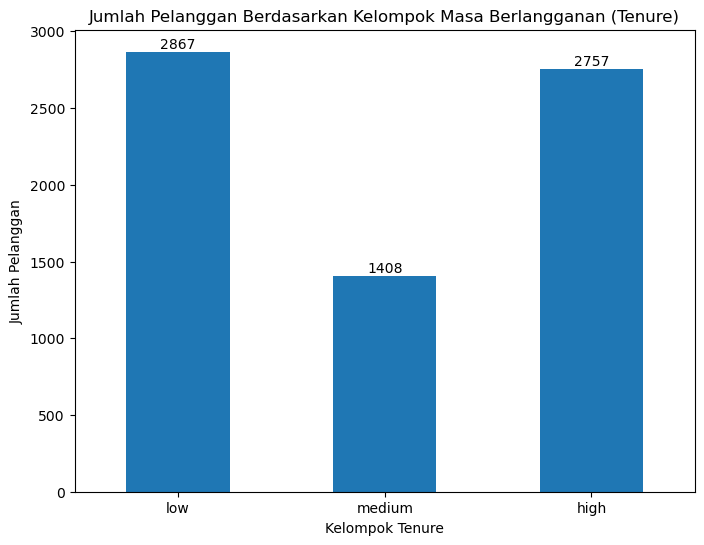

TenureGroup
low       2867
medium    1408
high      2757
Name: customerID, dtype: int64


In [4]:
# Tentukan batasan kelompok (bins) untuk tenure
bins = [0, 20, 40, df['tenure'].max()]

# Tentukan label untuk masing-masing kelompok
labels = ['low', 'medium', 'high']

# Gunakan pandas.cut untuk mengelompokkan data berdasarkan tenure
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels)

# Kelompokkan data berdasarkan TenureGroup dan hitung jumlah pelanggan
tenure_group_counts = df.groupby('TenureGroup')['customerID'].count()

# Buat grafik batang untuk jumlah pelanggan berdasarkan kelompok masa berlangganan
plt.figure(figsize=(8, 6))
tenure_group_counts.plot(kind='bar')
plt.xlabel("Kelompok Tenure")
plt.ylabel("Jumlah Pelanggan")
plt.title("Jumlah Pelanggan Berdasarkan Kelompok Masa Berlangganan (Tenure)")
plt.xticks(rotation=0)

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()
print(tenure_group_counts)

Berdasarkan jumlah unique users dalam setiap kelompok tenure, kita dapat membuat beberapa kesimpulan:

- Low Tenure (Tenure < 21 bulan): Jumlah unique users dalam kelompok "low_tenure" adalah 2,867 pelanggan. Ini menunjukkan bahwa sebagian besar pelanggan (2,867) memiliki masa langganan (tenure) yang kurang dari 21 bulan.

- High Tenure (Tenure > 40 bulan): Jumlah unique users dalam kelompok "high_tenure" adalah 2,757 pelanggan. Ini menunjukkan bahwa ada sejumlah pelanggan yang telah berlangganan selama lebih dari 40 bulan.

- Medium Tenure (Tenure antara 21 hingga 40 bulan): Jumlah unique users dalam kelompok "medium_tenure" adalah 1,408 pelanggan. Ini menunjukkan bahwa sebagian kecil pelanggan (1,408) memiliki masa langganan di kisaran 21 hingga 40 bulan.

Dengan demikian, dapat disimpulkan bahwa sebagian besar pelanggan memiliki masa langganan yang relatif pendek (kurang dari 21 bulan), sedangkan sejumlah pelanggan telah berlangganan selama waktu yang lebih lama (lebih dari 40 bulan), dengan jumlah pelanggan yang memiliki masa langganan di tengah-tengah (21 hingga 40 bulan) yang lebih sedikit dibandingkan dengan dua kelompok lainnya.


## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

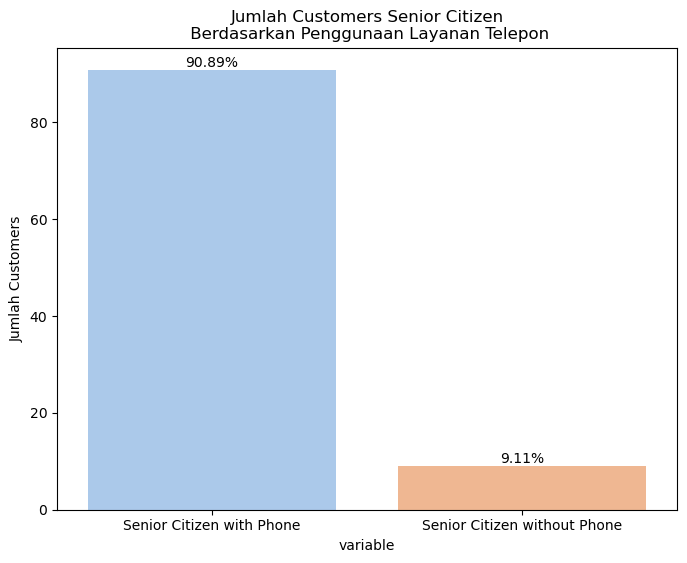

Jumlah Senior Citizen yang berlangganan PhoneService: 1038
Jumlah Senior Citizen yang tidak berlangganan PhoneService: 104
Rasio Senior Citizen yang berlangganan PhoneService terhadap yang tidak berlangganan: 90.89%


In [5]:
# Kelompokkan data berdasarkan apakah pelanggan merupakan warga senior dan menggunakan layanan telepon
senior_with_phone = df[(df['SeniorCitizen'] == 1) & (df['PhoneService'] == 'Yes')]

# Hitung jumlah pelanggan unik dalam setiap kelompok
senior_with_phone_count = senior_with_phone['customerID'].nunique()

senior_without_phone_count = df[(df['SeniorCitizen'] == 1) & (df['PhoneService'] == 'No')]['customerID'].nunique()

# Hitung rasio persentase dari jumlah pelanggan unik
total_senior_count = df[df['SeniorCitizen'] == 1]['customerID'].nunique()
ratio_senior_with_phone = (senior_with_phone_count / total_senior_count) * 100
ratio_senior_without_phone = (senior_without_phone_count / total_senior_count) * 100

# Buat grafik dengan Seaborn
data = {
    'Senior Citizen with Phone': [ratio_senior_with_phone],
    'Senior Citizen without Phone': [ratio_senior_without_phone]
}
df_ratio = pd.DataFrame(data)
df_ratio = df_ratio.melt()
plt.figure(figsize=(8, 6))
sns.barplot(x='variable', y='value', data=df_ratio, palette='pastel')
plt.ylabel("Jumlah Customers")
plt.title("Jumlah Customers Senior Citizen\n Berdasarkan Penggunaan Layanan Telepon")

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

print(f"Jumlah Senior Citizen yang berlangganan PhoneService: {senior_with_phone_count}")
print(f"Jumlah Senior Citizen yang tidak berlangganan PhoneService: {senior_without_phone_count}")
print(f"Rasio Senior Citizen yang berlangganan PhoneService terhadap yang tidak berlangganan: {ratio_senior_with_phone:.2f}%")



Jadi, dari plot di atas, dapat disimpulkan bahwa...
    
- Jumlah Senior Citizen yang berlangganan PhoneService: Terdapat 1,038 senior citizen yang berlangganan PhoneService.

- Jumlah Senior Citizen yang tidak berlangganan PhoneService: Hanya 104 senior citizen yang tidak berlangganan PhoneService.

- Rasio Senior Citizen yang berlangganan PhoneService terhadap yang tidak berlangganan: Rasio ini adalah 90.89%.

Kesimpulannya, mayoritas dari Senior Citizen (warga lanjut usia) berlangganan layanan telepon (PhoneService). Rasio 90.89% menunjukkan bahwa hampir semua Senior Citizen memilih untuk berlangganan layanan telepon, sementara hanya sedikit yang tidak berlangganan. Ini mungkin menunjukkan bahwa layanan telepon memiliki nilai yang tinggi bagi pelanggan senior dalam dataset ini.


## Bagaimana Distribusi dari TotalCharge?

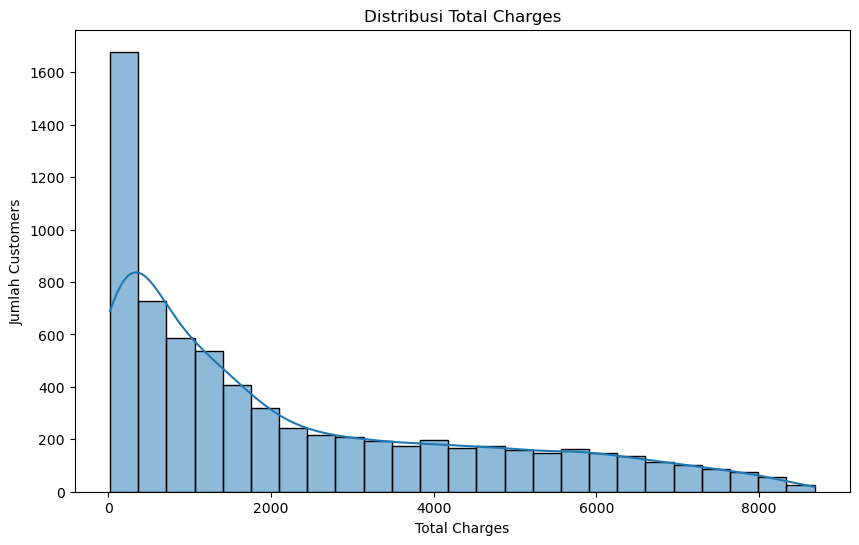

In [6]:
# Ubah tipe data kolom TotalCharges menjadi float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Menghapus baris dengan nilai NaN pada kolom TotalCharges (jika ada)
df = df.dropna(subset=['TotalCharges'])

# Membuat distribusi plot
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalCharges'], kde=True)
plt.xlabel("Total Charges")
plt.ylabel("Jumlah Customers")
plt.title("Distribusi Total Charges")
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa...
    
- Banyak Customer dengan TotalCharges 0: Tingginya jumlah customer dengan 'TotalCharges' sebesar 0 dapat mengindikasikan bahwa ada sejumlah besar pelanggan yang baru saja mulai berlangganan atau belum melakukan transaksi yang menghasilkan biaya tambahan. Ini bisa menjadi situasi di mana pelanggan baru atau pelanggan yang baru-baru ini berlangganan belum melakukan pembayaran awal atau belum melakukan transaksi apa pun yang menghasilkan biaya.

- Plot Condong ke Kanan: Jika plot distribusi 'TotalCharges' condong ke kanan, ini menunjukkan bahwa sebagian besar pelanggan memiliki 'TotalCharges' yang rendah atau dekat dengan 0, sementara hanya sedikit pelanggan yang memiliki 'TotalCharges' yang tinggi. Ini mungkin mengindikasikan bahwa mayoritas pelanggan hanya menggunakan layanan dasar tanpa layanan tambahan atau biaya tambahan yang signifikan.

- Kemungkinan Perlu Diperhatikan: Kondisi di mana banyak pelanggan memiliki 'TotalCharges' 0 mungkin perlu diperhatikan oleh perusahaan, karena bisa mencerminkan pelanggan yang mungkin perlu diinformasikan tentang biaya atau layanan tambahan yang tersedia, atau bisa juga mencerminkan masalah dalam pelaporan data.

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

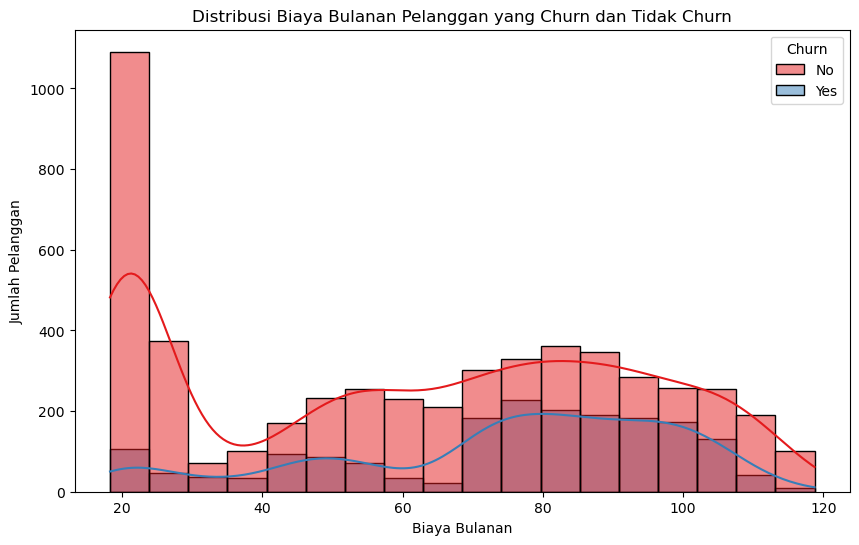

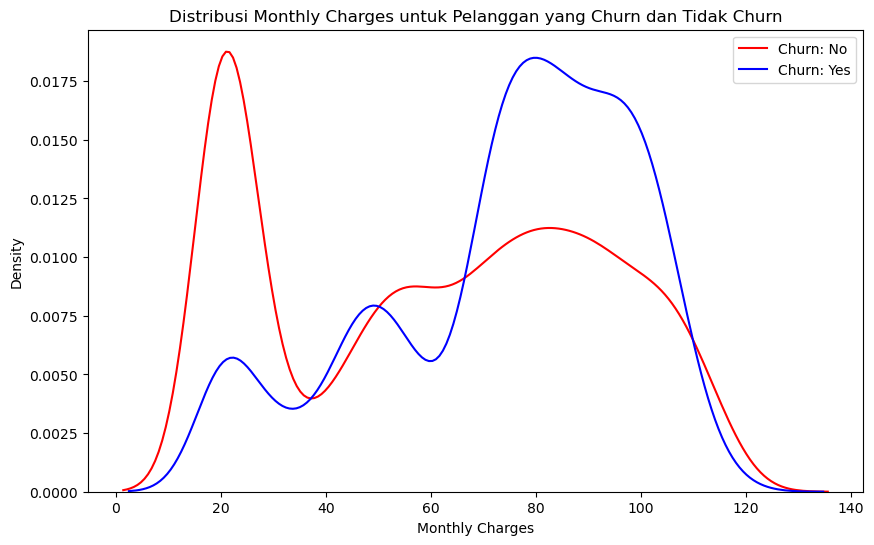

In [7]:
# Membuat plot distribusi biaya bulanan untuk pelanggan yang berhenti dan yang tidak berhenti berlangganan
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', kde=True, hue='Churn', palette="Set1")

plt.xlabel("Biaya Bulanan")
plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi Biaya Bulanan Pelanggan yang Churn dan Tidak Churn")
plt.show()

# Membuat line graph distribusi monthly charges untuk pelanggan yang churn
plt.figure(figsize=(10, 6))

# Menghitung distribusi monthly charges untuk pelanggan yang tidak churn
non_churned_customers = df[df['Churn'] == 'No']['MonthlyCharges']
sns.kdeplot(non_churned_customers, color='red', label='Churn: No')

# Menghitung distribusi monthly charges untuk pelanggan yang churn
churned_customers = df[df['Churn'] == 'Yes']['MonthlyCharges']
sns.kdeplot(churned_customers, color='blue', label='Churn: Yes')

plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.title("Distribusi Monthly Charges untuk Pelanggan yang Churn dan Tidak Churn")
plt.legend()
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa...

Grafik di atas membandingkan distribusi biaya bulanan antara pelanggan yang berhenti berlangganan (Churn) dan pelanggan yang tetap berlangganan (No Churn). Dari grafik ini, kita dapat melihat apakah pelanggan dengan biaya bulanan yang lebih tinggi cenderung untuk berhenti berlangganan.

- Faktor Pengaruh: Monthly charges yang tinggi mungkin menjadi faktor yang memengaruhi kecenderungan churn. Pelanggan dengan biaya bulanan yang lebih tinggi mungkin lebih cenderung berhenti jika mereka merasa biaya tersebut tidak sebanding dengan layanan yang mereka terima atau jika mereka menemukan penawaran yang lebih baik di tempat lain.

- Potensi Tindakan: Informasi ini dapat membantu perusahaan untuk mengidentifikasi kelompok pelanggan dengan risiko churn yang lebih tinggi. Ini memungkinkan perusahaan untuk merancang strategi retensi yang lebih cermat, seperti menawarkan diskon, layanan tambahan, atau promosi khusus kepada pelanggan dengan monthly charges di rentang ini.

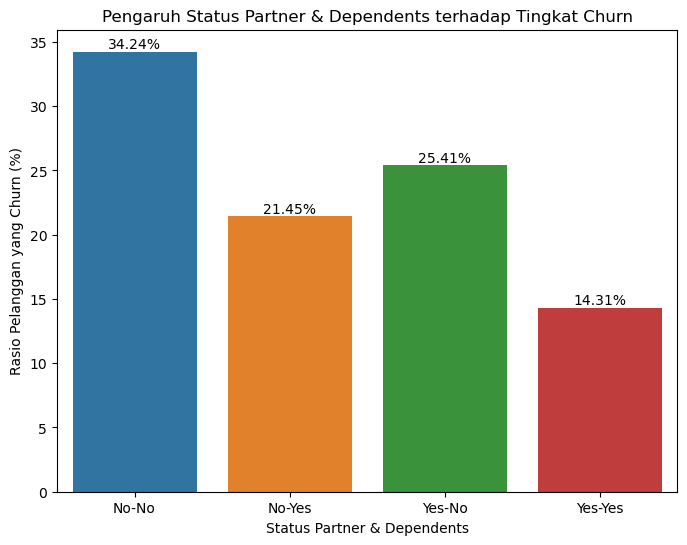

In [8]:
# Gabungkan data untuk menentukan kategori-kategori berdasarkan memiliki pasangan dan/atau tanggungan
unique_customers = df.groupby('customerID').first().reset_index()
unique_customers['PartnerDependents'] = unique_customers['Partner'] + '-' + unique_customers['Dependents']

# Hitung rasio pelanggan yang berhenti berlangganan (churn) untuk setiap kategori
churn_ratio = unique_customers.groupby('PartnerDependents')['Churn'].value_counts(normalize=True).unstack()['Yes'].reset_index()

# Hitung rasio pelanggan yang berhenti berlangganan (churn) untuk setiap kategori dan kalikan dengan 100
churn_ratio = churn_ratio.rename(columns={'Yes': 'Churn_Ratio'})
churn_ratio['Churn_Ratio'] *= 100

# Buat grafik dengan Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=churn_ratio, x='PartnerDependents', y='Churn_Ratio')
plt.xlabel("Status Partner & Dependents")
plt.ylabel("Rasio Pelanggan yang Churn (%)")
plt.title("Pengaruh Status Partner & Dependents terhadap Tingkat Churn")
plt.xticks(rotation=0)

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa...

Kesimpulannya, memiliki pasangan dan tanggungan tampaknya memiliki pengaruh yang berbeda terhadap kecenderungan churn pelanggan. Pelanggan yang memiliki keduanya (Yes-Yes) memiliki tingkat churn yang lebih rendah, sementara pelanggan yang tidak memiliki keduanya (No-No) memiliki tingkat churn yang lebih tinggi. Ini dapat memberikan wawasan penting bagi perusahaan untuk merancang strategi retensi yang lebih efektif berdasarkan situasi pelanggan.

## Buatlah plot dengan python dan insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut dengan memanfaatkan atribut tenure, contract, monthly charges, status*, jumlah pelanggan, dan churn!

Pelanggan banyak melakukan churn,
- Pada saat tenure berapa bulan?
- Term contract jenis apa yang dipilih oleh pelanggan?
- Status pelanggan seperti apa? Bagaimana persebarannya jika dilihat dari tenure
pelanggan?
- Berapa monthly charges pelanggan? Apakah status berpengaruh pada monthly
charges pelanggan?

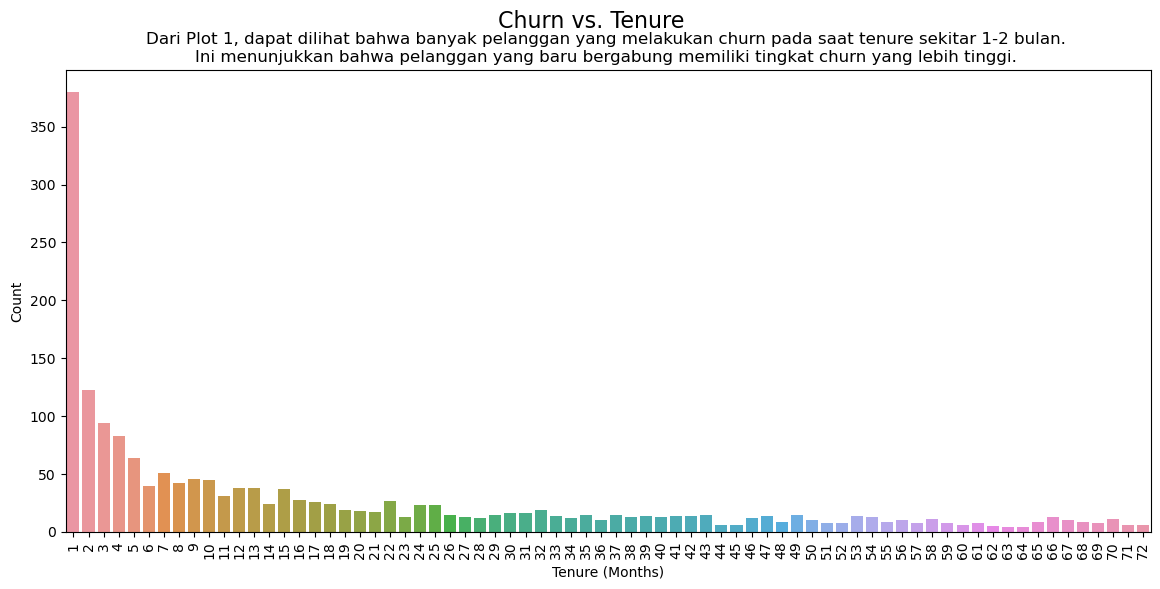

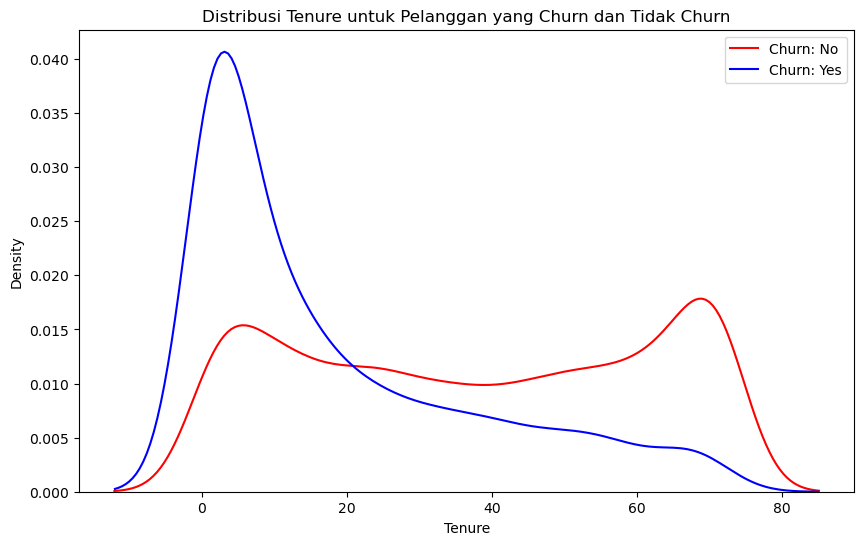


2. Term contract jenis apa yang paling berpengaruh pada tingkat churn pelanggan?


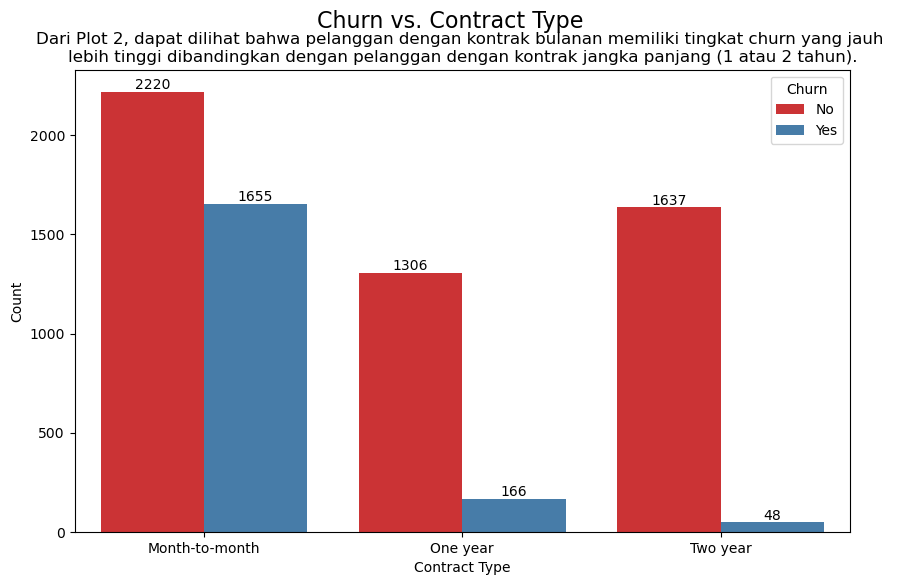


3. Bagaimana persebaran status pelanggan berdasarkan tenure?


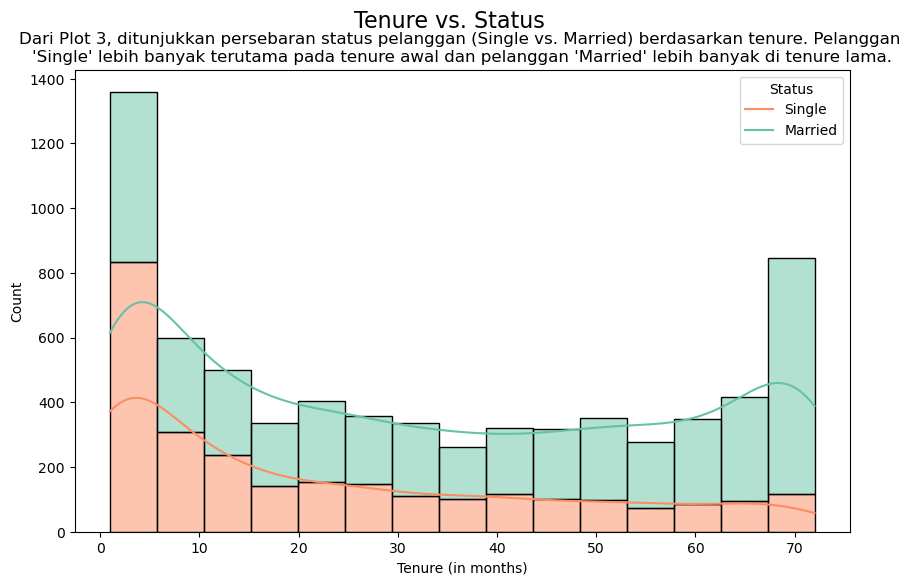


4. Bagaimana hubungan antara monthly charges dengan status?


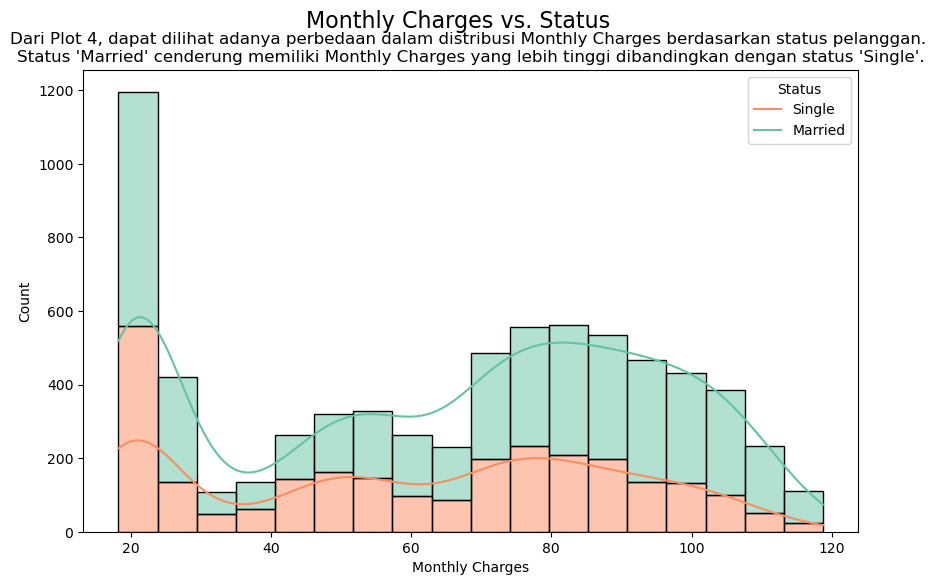

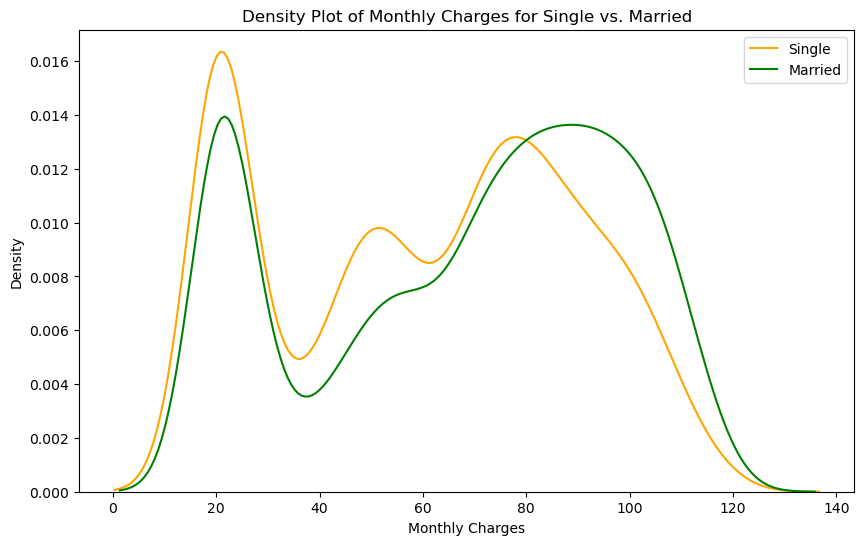


5. Bagaimana pengaruh status pelanggan terhadap tingkat churn?


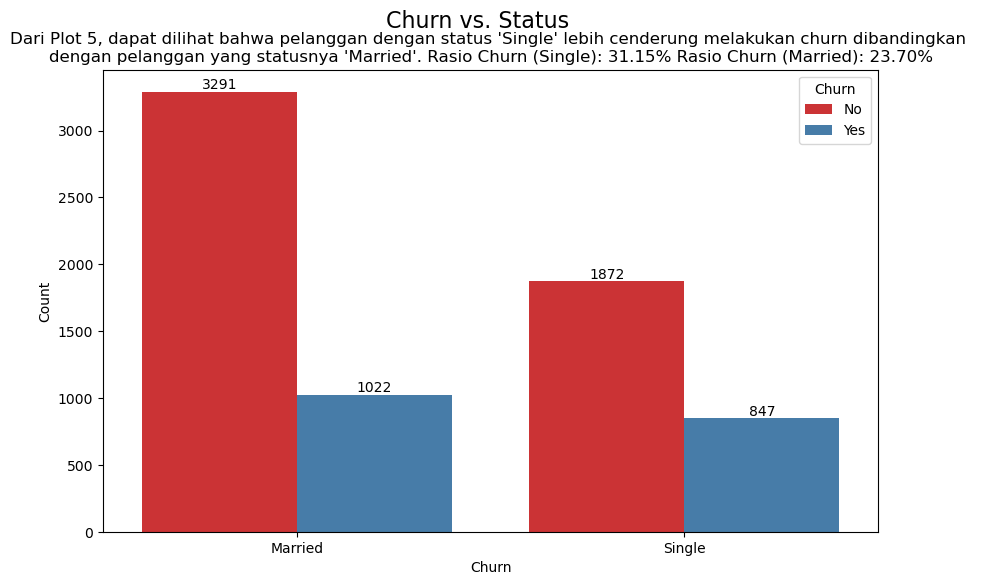

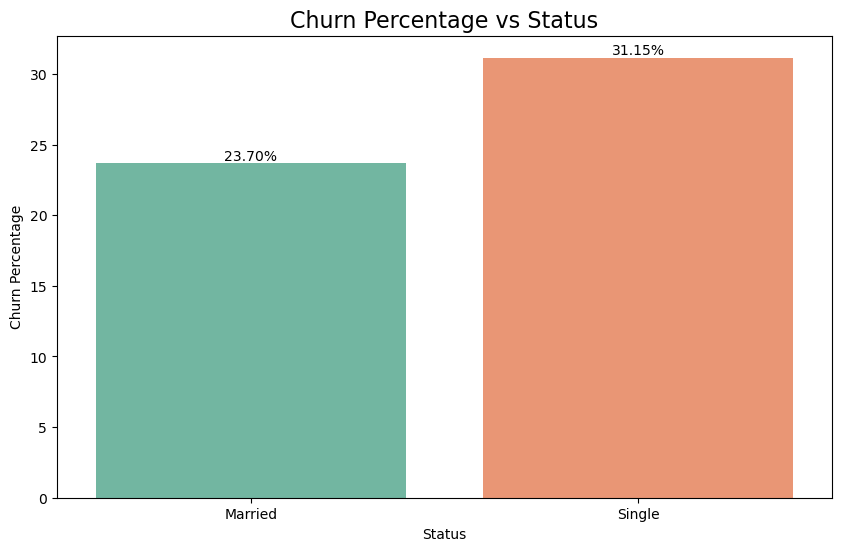

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define status based on the given criteria
def define_status(row):
    if row["SeniorCitizen"] == 1 or row["Partner"] == "Yes" or row["Dependents"] == "Yes":
        return "Married"
    else:
        return "Single"
    
df["Status"] = df.apply(define_status, axis=1)

# Plot 1: Churn vs. Tenure
churn_yes_data = df[df["Churn"] == "Yes"]
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=churn_yes_data, x="tenure")
storyline_1 = "Dari Plot 1, dapat dilihat bahwa banyak pelanggan yang melakukan churn pada saat tenure sekitar 1-2 bulan. \nIni menunjukkan bahwa pelanggan yang baru bergabung memiliki tingkat churn yang lebih tinggi. "
plt.suptitle("Churn vs. Tenure", fontsize=16)
plt.title(storyline_1, fontsize=12)
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.show()

# Membuat line graph distribusi tenure untuk pelanggan yang churn
plt.figure(figsize=(10, 6))
non_churned_tenure = df[df['Churn'] == 'No']['tenure']
sns.kdeplot(non_churned_tenure, color='red', label='Churn: No')
churned_tenure = df[df['Churn'] == 'Yes']['tenure']
sns.kdeplot(churned_tenure, color='blue', label='Churn: Yes')
plt.xlabel("Tenure")
plt.ylabel("Density")
plt.title("Distribusi Tenure untuk Pelanggan yang Churn dan Tidak Churn")
plt.legend()
plt.show()

# Plot 2: Churn vs. Contract Type
print("\n2. Term contract jenis apa yang paling berpengaruh pada tingkat churn pelanggan?")
plt.figure(figsize=(10, 6))
sns.countplot(x="Contract", hue="Churn", data=df, palette="Set1")
storyline_2 = "Dari Plot 2, dapat dilihat bahwa pelanggan dengan kontrak bulanan memiliki tingkat churn yang jauh \nlebih tinggi dibandingkan dengan pelanggan dengan kontrak jangka panjang (1 atau 2 tahun)."
plt.suptitle("Churn vs. Contract Type", fontsize=16)
plt.title(storyline_2, fontsize=12)
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right", labels=["No", "Yes"])

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

# Plot 3: Tenure vs. Status
print("\n3. Bagaimana persebaran status pelanggan berdasarkan tenure?")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="tenure", hue="Status", kde=True, common_norm=False,  multiple='stack',palette="Set2")
storyline_3 = "Dari Plot 3, ditunjukkan persebaran status pelanggan (Single vs. Married) berdasarkan tenure. Pelanggan \n'Single' lebih banyak terutama pada tenure awal dan pelanggan 'Married' lebih banyak di tenure lama."
plt.suptitle("Tenure vs. Status", fontsize=16)
plt.title(storyline_3, fontsize=12)
plt.xlabel("Tenure (in months)")
plt.ylabel("Count")
plt.legend(title="Status", loc="upper right", labels=["Single", "Married"])
plt.show()

# Plot 4: Monthly Charges vs. Status
print("\n4. Bagaimana hubungan antara monthly charges dengan status?")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="MonthlyCharges", hue="Status", kde=True, multiple='stack', palette="Set2")
storyline_4 = "Dari Plot 4, dapat dilihat adanya perbedaan dalam distribusi Monthly Charges berdasarkan status pelanggan. \nStatus 'Married' cenderung memiliki Monthly Charges yang lebih tinggi dibandingkan dengan status 'Single'."
plt.suptitle("Monthly Charges vs. Status", fontsize=16)
plt.title(storyline_4, fontsize=12)
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.legend(title="Status", labels=["Single", "Married"])
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(df[df['Status'] == 'Single']['MonthlyCharges'], color="orange", ax=ax, label="Single")
sns.kdeplot(df[df['Status'] == 'Married']['MonthlyCharges'], color="green", ax=ax, label="Married")
plt.title("Density Plot of Monthly Charges for Single vs. Married")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.legend()
plt.show()

# Hitung rasio churn untuk pelanggan Single dan Married
total_single_customers = len(df[df["Status"] == "Single"])
total_married_customers = len(df[df["Status"] == "Married"])

churn_single_customers = len(df[(df["Status"] == "Single") & (df["Churn"] == "Yes")])
churn_married_customers = len(df[(df["Status"] == "Married") & (df["Churn"] == "Yes")])

ratio_churn_single = churn_single_customers / total_single_customers
ratio_churn_married = churn_married_customers / total_married_customers

# Plot 5: Churn vs. Status
print("\n5. Bagaimana pengaruh status pelanggan terhadap tingkat churn?")
plt.figure(figsize=(10, 6))
sns.countplot(x="Status", hue="Churn", data=df, palette="Set1")
storyline_5 = "Dari Plot 5, dapat dilihat bahwa pelanggan dengan status 'Single' lebih cenderung melakukan churn dibandingkan \ndengan pelanggan yang statusnya 'Married'. "
storyline_5 += f"Rasio Churn (Single): {ratio_churn_single:.2%} Rasio Churn (Married): {ratio_churn_married:.2%}"
plt.suptitle("Churn vs. Status", fontsize=16)
plt.title(storyline_5, fontsize=12)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right", labels=["No", "Yes"])

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.legend(title="Churn", loc="upper right", labels=["No", "Yes"])
plt.show()

ratio_df = pd.DataFrame({"Status": ["Married", "Single"], "Churn Percentage": [ratio_churn_married * 100, ratio_churn_single * 100]})

plt.figure(figsize=(10, 6))
sns.barplot(x="Status", y="Churn Percentage", data=ratio_df, palette="Set2")
plt.title("Churn Percentage vs Status", fontsize=16)
plt.xlabel("Status")
plt.ylabel("Churn Percentage")

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()
